In [129]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

seed = 42

In [3]:
data = pd.read_csv("datass/dataset.csv")

In [4]:
# data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]
data = data[(data['Income_Category'] != 'Unknown')]


In [5]:
data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.840266
1    0.159734
Name: proportion, dtype: float64

In [6]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [7]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

In [8]:
categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_encoded, y, test_size=0.2, random_state=seed, shuffle=True)

In [10]:
clf = SVC(kernel='rbf')
scaler = StandardScaler()

scaler.fit_transform(x_train)
clf.fit(scaler.fit_transform(x_train), y_train)
r2 = clf.score(scaler.transform(x_val), y_val)
y_hat = clf.predict(scaler.transform(x_val))
accuracy = accuracy_score(y_val, y_hat) 
confusion = confusion_matrix(y_val, y_hat)  # Calcola la matrice di confusione

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.91
Confusion Matrix:
[[1488   29]
 [ 134  152]]


In [11]:
res = []

for C in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
    for gamma in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
        clf = SVC(kernel='rbf', gamma=gamma, C=C)
        scaler = StandardScaler()

        scaler.fit_transform(x_train)
        clf.fit(scaler.fit_transform(x_train), y_train)
        y_hat = clf.predict(scaler.transform(x_val))

        accuracy = accuracy_score(y_val, y_hat)
        precision = precision_score(y_val, y_hat)
        recall = recall_score(y_val, y_hat)
        f1 = f1_score(y_val, y_hat)

        print(f'{C=}, {gamma=}, {accuracy=}, {precision=}, {recall=}, {f1=}')
        res.append({
            'C': C,
            'gamma': gamma,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arra

C=0.001, gamma=0.001, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.004641588833612777, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.021544346900318832, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.1, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.46415888336127775, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=2.154434690031882, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=10.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=46.41588833612773, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=215.44346900318823, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=1000.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.001, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.004641588833612777, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.021544346900318832, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.1, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.46415888336127775, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=2.154434690031882, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


KeyboardInterrupt: 

In [ ]:
heatmap_data = pd.DataFrame(res).pivot(index='C', columns='gamma', values='Recall')
heatmap_data

gamma,0.001000,0.004642,0.021544,0.100000,0.464159,2.154435,10.000000,46.415888,215.443469,1000.000000
C,,,,,,,,,,
0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.004642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.021544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.100000,0.000000,0.000000,0.202797,0.279720,0.153846,0.003497,0.000000,0.000000,0.000000,0.000000
0.464159,0.000000,0.276224,0.391608,0.465035,0.412587,0.094406,0.017483,0.006993,0.000000,0.000000
2.154435,0.279720,0.416084,0.493007,0.552448,0.545455,0.262238,0.101399,0.059441,0.034965,0.013986
10.000000,0.416084,0.458042,0.566434,0.573427,0.580420,0.265734,0.101399,0.059441,0.034965,0.013986
46.415888,0.451049,0.517483,0.573427,0.611888,0.587413,0.269231,0.101399,0.059441,0.034965,0.013986
215.443469,0.465035,0.562937,0.576923,0.611888,0.583916,0.283217,0.101399,0.059441,0.034965,0.013986


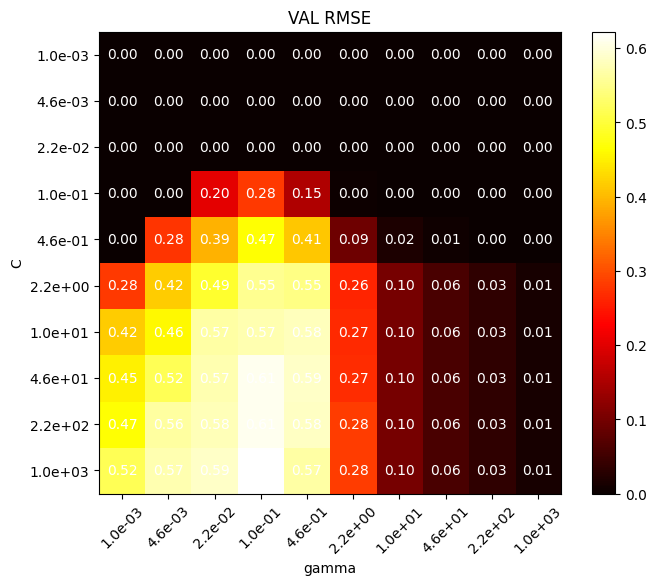

In [ ]:
p_range = np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True)
p_range_str = [f'{p:.1e}' for p in p_range]

fig, ax = plt.subplots(figsize=(8,6))

heatmap = ax.imshow(
    heatmap_data,
    interpolation="nearest",
    cmap=plt.cm.hot,
)

data_v = heatmap_data.values
for i in range(data_v.shape[0]):
    for j in range(data_v.shape[1]):
        c = 'black' if data_v[i, j] >= 1 else 'white'
        ax.text(j, i, f'{data_v[i, j]:.2f}', ha='center', va='center', color=c, fontsize=10)


ax.set_xlabel("gamma")
ax.set_ylabel("C")
plt.colorbar(heatmap, ax=ax)
ax.set_xticks(np.arange(len(p_range)), p_range_str, rotation=45)
ax.set_yticks(np.arange(len(p_range)), p_range_str)
plt.title("VAL RMSE")
plt.show()

In [12]:
df = pd.DataFrame(res)
df.iloc[df.Recall.argmax()]

C            0.001000
gamma        0.001000
Accuracy     0.841375
Precision    0.000000
Recall       0.000000
F1-score     0.000000
Name: 0, dtype: float64

In [13]:
C = 1000.000000
gamma = 0.100000

In [14]:
print(f'SVC, {C=}, {gamma=}')
clf = SVC(C=C, gamma=gamma, kernel='rbf')
scaler = StandardScaler()

clf.fit(scaler.fit_transform(x_train), y_train)

y_hat_val = clf.predict(scaler.transform(x_val))
accuracy = accuracy_score(y_val, y_hat_val)
precision = precision_score(y_val, y_hat_val)
recall = recall_score(y_val, y_hat_val)
print(f'VAL: {accuracy=}, {recall=}')


SVC, C=1000.0, gamma=0.1


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VAL: accuracy=0.8707709373266778, recall=0.6223776223776224


In [15]:
confusion_val = confusion_matrix(y_val, y_hat_val)
print(confusion_val)

[[1392  125]
 [ 108  178]]


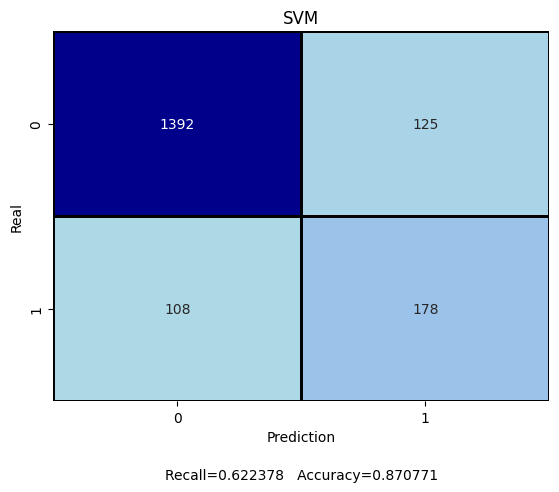

In [16]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
# Definisci la tua colormap personalizzata con tonalità di blu
custom_cmap = colors.LinearSegmentedColormap.from_list(
    'custom_blues', ['#ADD8E6', '#0000FF','#00008B'])

# Calcola la matrice di confusione
cm = confusion_matrix(y_val, y_hat_val)

# Crea la heatmap utilizzando la colormap personalizzata
sns.heatmap(cm, annot=True, fmt='.0f', cmap=custom_cmap, cbar=False, linecolor='Black', linewidths='1')

plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title('SVM')
plt.text(0.5, -0.2, 'Recall=0.622378   Accuracy=0.870771', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

In [24]:
coefficients = clf.dual_coef_.transpose()
support_vectors = clf.support_vectors_
support_vectors_transposed = support_vectors.transpose()
# Eseguire l'analisi delle pesate dei support vectors
weighted_features = (coefficients * support_vectors).mean(axis=0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


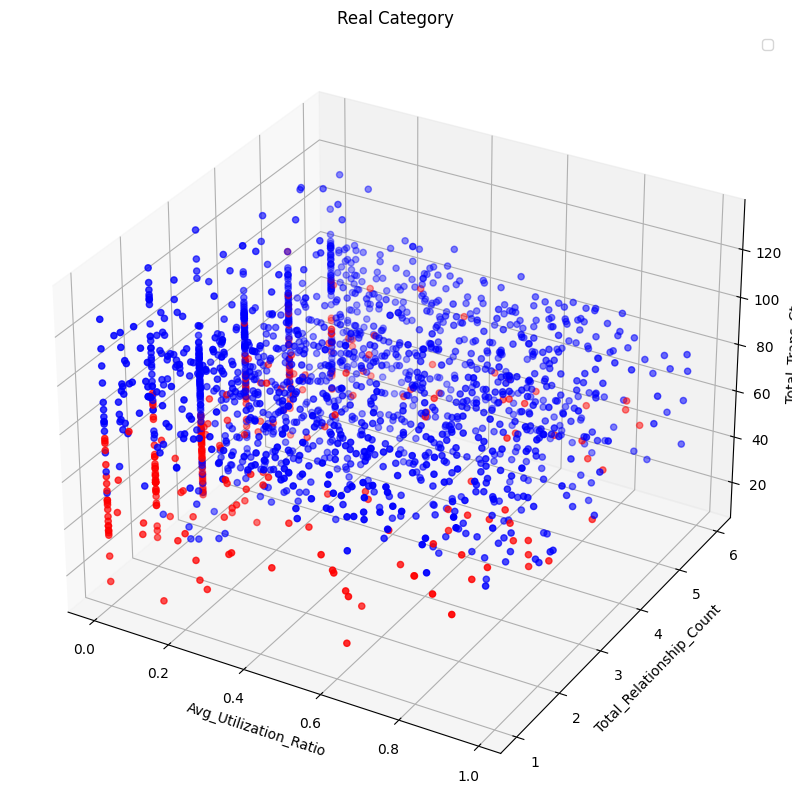

In [126]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che x_train sia una matrice con 3 features (x1, x2, x3)
# y_train sia l'array delle etichette di classe reali
# y_pred sia l'array delle etichette di classe predette

# Creazione del grafico tridimensionale
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')

# Estrazione delle features
x1 = x_val['Avg_Utilization_Ratio']
x2 = x_val['Total_Relationship_Count']
x3 = x_val['Total_Trans_Ct']


# Tracciamento dei punti dei dati
custom_cmap = colors.LinearSegmentedColormap.from_list(
    'custom_blues', ['blue', 'red'])

ax.scatter(x1, x2, x3, c=y_val, cmap=custom_cmap)

# Etichettatura degli assi
ax.set_xlabel('Avg_Utilization_Ratio')
ax.set_ylabel('Total_Relationship_Count')
ax.set_zlabel('Total_Trans_Ct')
ax.set_title('Real Category')
ax.legend()
# Visualizzazione del grafico
plt.show()

In [80]:
np.array(x1)

array([0.745, 0.127, 0.696, ..., 0.462, 0.291, 0.03 ])

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11284\2369903477.py:24: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11284\2369903477.py:25: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11284\2369903477.py:26: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_11284\2369903477.py:27: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



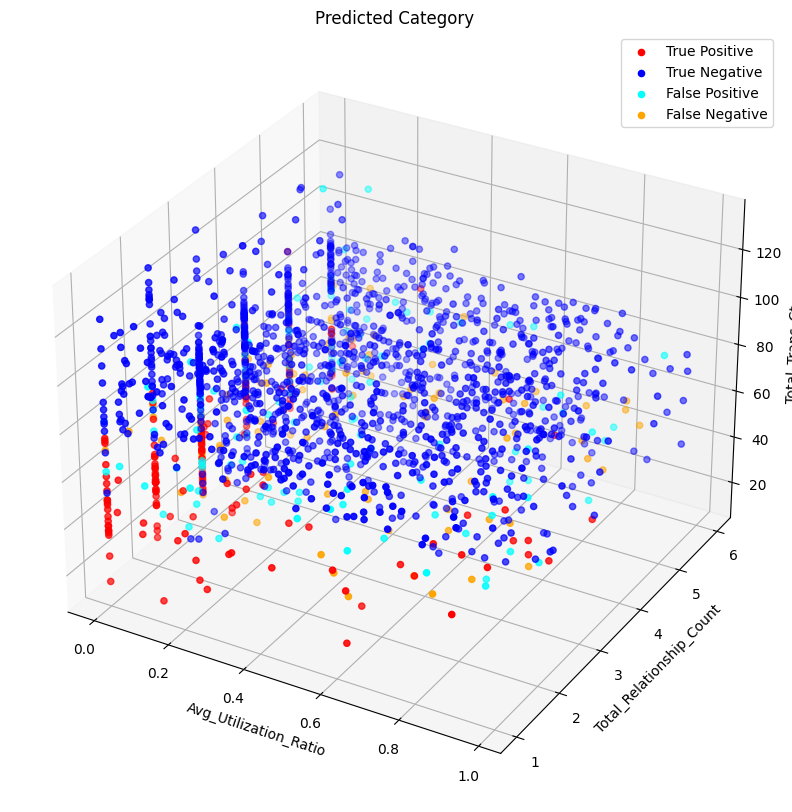

In [128]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che x_train sia una matrice con 3 features (x1, x2, x3)
# y_train sia l'array delle etichette di classe reali
# y_pred sia l'array delle etichette di classe predette

# Creazione del grafico tridimensionale
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')
x1 = np.array(x_val['Avg_Utilization_Ratio'])
x2 = np.array(x_val['Total_Relationship_Count'])
x3 = np.array(x_val['Total_Trans_Ct'])
y_val_equals_1 = (np.array(y_val).transpose() == 1)
y_hat_equals_1 = (y_hat_val == 1)
y_val_equals_0 = (np.array(y_val).transpose() == 0)
y_hat_equals_0 = (y_hat_val == 0)
True_Positive = np.logical_and(y_val_equals_1, y_hat_equals_1)
True_Negative = np.logical_and(y_val_equals_0, y_hat_equals_0)
False_Positive = np.logical_and(y_val_equals_0, y_hat_equals_1)
False_Negative = np.logical_and(y_val_equals_1, y_hat_equals_0)

# Tracciamento dei punti dei dati con etichette reali
ax.scatter(x1[np.where(True_Positive)[1]], x2[np.where(True_Positive)[1]], x3[np.where(True_Positive)[1]], c='red', cmap='cool', label='True Positive')
ax.scatter(x1[np.where(True_Negative)[1]], x2[np.where(True_Negative)[1]], x3[np.where(True_Negative)[1]], c='blue', cmap='cool', label='True Negative')
ax.scatter(x1[np.where(False_Positive)[1]], x2[np.where(False_Positive)[1]], x3[np.where(False_Positive)[1]], c='aqua', cmap='cool', label='False Positive')
ax.scatter(x1[np.where(False_Negative)[1]], x2[np.where(False_Negative)[1]], x3[np.where(False_Negative)[1]], c='orange', cmap='cool', label='False Negative')

# Etichettatura degli assi
ax.set_xlabel('Avg_Utilization_Ratio')
ax.set_ylabel('Total_Relationship_Count')
ax.set_zlabel('Total_Trans_Ct')
ax.legend()
ax.set_title('Predicted Category')
# Visualizzazione del grafico
plt.show()


In [131]:

import plotly.graph_objects as go

# Creazione del grafico tridimensionale
fig = go.Figure()

# Tracciamento dei punti dei dati con etichette reali
fig.add_trace(go.Scatter3d(
    x=x1[np.where(True_Positive)[1]],
    y=x2[np.where(True_Positive)[1]],
    z=x3[np.where(True_Positive)[1]],
    mode='markers',
    marker=dict(color='green'),
    name='True Positive'
))

fig.add_trace(go.Scatter3d(
    x=x1[np.where(True_Negative)[1]],
    y=x2[np.where(True_Negative)[1]],
    z=x3[np.where(True_Negative)[1]],
    mode='markers',
    marker=dict(color='blue'),
    name='True Negative'
))

fig.add_trace(go.Scatter3d(
    x=x1[np.where(False_Positive)[1]],
    y=x2[np.where(False_Positive)[1]],
    z=x3[np.where(False_Positive)[1]],
    mode='markers',
    marker=dict(color='red'),
    name='False Positive'
))

fig.add_trace(go.Scatter3d(
    x=x1[np.where(False_Negative)[1]],
    y=x2[np.where(False_Negative)[1]],
    z=x3[np.where(False_Negative)[1]],
    mode='markers',
    marker=dict(color='orange'),
    name='False Negative'
))

# Impostazione delle etichette degli assi
fig.update_layout(scene=dict(
    xaxis_title='Avg_Utilization_Ratio',
    yaxis_title='Total_Relationship_Count',
    zaxis_title='Total_Trans_Ct'
))

# Visualizzazione del grafico
fig.show()


### FEATURE SELECTION for SVM

In [ ]:
import itertools
from tqdm import tqdm

In [ ]:
data = pd.read_csv("datass/dataset.csv")
# Rimuovi le righe in base alle condizioni specificate
# data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]
data = data[(data['Income_Category'] != 'Unknown')]

data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.840266
1    0.159734
Name: proportion, dtype: float64

In [ ]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [ ]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [ ]:
C

1000.0

In [ ]:
gamma

0.1

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_encoded, y, test_size=0.3, random_state=seed, shuffle=True)

K = 2    # Numero di features da escluder (dopo calcola tutte le combinazioni possibili)
all_cols = [c for c in list(x_train.columns.values)]
assert 1 <= K and K <= len(all_cols)
print(f'>>> {K=}')

cols = [list(x) for x in itertools.combinations(all_cols, K)]

scaler = StandardScaler()
res = []
for c in tqdm(cols):
    _x_train = x_train.drop(columns=c) 
    _x_val = x_val.drop(columns=c)

    clf = SVC(C=C, gamma=gamma, kernel='rbf')
    clf.fit(scaler.fit_transform(_x_train), y_train)
    y_hat = clf.predict(scaler.transform(_x_val))
    recall = recall_score(y_val, y_hat)
    res.append({
        'dropping': c,
        'remaining_cols': list(_x_train.columns.values),
        'Recall': recall,
    })


print(res)
pd.DataFrame(res).to_csv(f'_{K}_select.csv') # Salva il file con tutte le accuracy in base alla combinazione
print('>>> Saved')

>>> K=2


  0%|          | 0/78 [00:00<?, ?it/s]C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  1%|▏         | 1/78 [00:05<07:12,  5.61s/it]C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  3%|▎         | 2/78 [00:10<06:23,  5.05s/it]C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-package

[{'dropping': ['Dependent_count', 'Total_Relationship_Count'], 'remaining_cols': ['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M', 'Income_Category_$120K +', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K'], 'Recall': 0.49078341013824883}, {'dropping': ['Dependent_count', 'Months_Inactive_12_mon'], 'remaining_cols': ['Total_Relationship_Count', 'Contacts_Count_12_mon', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M', 'Income_Category_$120K +', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K'], 'Recall': 0.5046082949308756}, {'dropping': ['Dependent_count', 'Contacts_Count_12_mon'], 'remaining_cols': ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M', 'Income_Category_$120K +', 

In [ ]:
df_max = pd.read_csv('_1_select.csv')

max_raw = df_max[df_max['Recall'] == df_max['Recall'].max()]
print(max_raw)


FileNotFoundError: [Errno 2] No such file or directory: '_1_select.csv'

In [ ]:
df_max = pd.read_csv('_2_select.csv')

max_raw = df_max[df_max['Recall'] == df_max['Recall'].max()]
print(max_raw)

    Unnamed: 0                                           dropping  \
72          72  ['Income_Category_$40K - $60K', 'Income_Catego...   

                                       remaining_cols    Recall  
72  ['Dependent_count', 'Total_Relationship_Count'...  0.589862  
